In [1]:
from src.data import CICIDS2017
from src.data.utils import balanced_sample, encode_labels
from sklearn.model_selection import train_test_split
from src.models.tabnet import TabNetModel
from src.pipelines.utils import train_and_evaluate, plot_accuracies

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [2]:
data = CICIDS2017()
data.load()
data = balanced_sample(data.data, "Label", 10000)
# x, y = encode_labels(data, "Label")
x = data.drop(columns=["Label"]).values
y = data["Label"].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

2025-03-06 04:09:47,979 - INFO - Loading dataset...


In [5]:
tabnet = TabNetModel()

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


2025-03-06 04:10:24,595 - INFO - Pretraining for TabNet...


epoch 0  | loss: 64.93379| val_0_unsup_loss_numpy: 1.1738899946212769|  0:00:03s
epoch 1  | loss: 1.10424 | val_0_unsup_loss_numpy: 0.9849600195884705|  0:00:06s
epoch 2  | loss: 0.9364  | val_0_unsup_loss_numpy: 0.780430018901825|  0:00:09s
epoch 3  | loss: 0.82766 | val_0_unsup_loss_numpy: 0.7578399777412415|  0:00:12s
epoch 4  | loss: 0.78098 | val_0_unsup_loss_numpy: 0.732200026512146|  0:00:15s
epoch 5  | loss: 0.73582 | val_0_unsup_loss_numpy: 0.6453800201416016|  0:00:18s
epoch 6  | loss: 0.71567 | val_0_unsup_loss_numpy: 0.6183099746704102|  0:00:21s
epoch 7  | loss: 0.68943 | val_0_unsup_loss_numpy: 0.6153799891471863|  0:00:24s
epoch 8  | loss: 0.65775 | val_0_unsup_loss_numpy: 0.5706400275230408|  0:00:27s
epoch 9  | loss: 0.62884 | val_0_unsup_loss_numpy: 0.6065199971199036|  0:00:30s
epoch 10 | loss: 0.61326 | val_0_unsup_loss_numpy: 0.5475800037384033|  0:00:34s
epoch 11 | loss: 0.59435 | val_0_unsup_loss_numpy: 0.5419300198554993|  0:00:37s
epoch 12 | loss: 0.58883 | val

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
2025-03-06 04:14:26,549 - INFO - Training TabNet model...


epoch 80 | loss: 0.45837 | val_0_unsup_loss_numpy: 0.4077099859714508|  0:03:59s

Early stopping occurred at epoch 80 with best_epoch = 70 and best_val_0_unsup_loss_numpy = 0.3991900086402893


c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 2.22977 | val_accuracy: 0.71641 |  0:00:02s
epoch 1  | loss: 0.70337 | val_accuracy: 0.82546 |  0:00:04s
epoch 2  | loss: 0.54023 | val_accuracy: 0.8923  |  0:00:07s
epoch 3  | loss: 0.39884 | val_accuracy: 0.90008 |  0:00:09s
epoch 4  | loss: 0.37003 | val_accuracy: 0.91368 |  0:00:12s
epoch 5  | loss: 0.35749 | val_accuracy: 0.90874 |  0:00:14s
epoch 6  | loss: 0.34672 | val_accuracy: 0.8965  |  0:00:16s
epoch 7  | loss: 0.33085 | val_accuracy: 0.91293 |  0:00:19s
epoch 8  | loss: 0.32592 | val_accuracy: 0.90637 |  0:00:21s
epoch 9  | loss: 0.32332 | val_accuracy: 0.90123 |  0:00:24s
epoch 10 | loss: 0.2875  | val_accuracy: 0.9176  |  0:00:26s
epoch 11 | loss: 0.28639 | val_accuracy: 0.91564 |  0:00:28s
epoch 12 | loss: 0.27859 | val_accuracy: 0.90793 |  0:00:31s
epoch 13 | loss: 0.25881 | val_accuracy: 0.92795 |  0:00:33s
epoch 14 | loss: 0.25735 | val_accuracy: 0.91266 |  0:00:35s
epoch 15 | loss: 0.28043 | val_accuracy: 0.9287  |  0:00:38s
epoch 16 | loss: 0.26113

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
2025-03-06 04:15:53,615 - INFO - Train Accuracy: 0.9475
2025-03-06 04:15:53,616 - INFO - Validation Accuracy: 0.9487
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

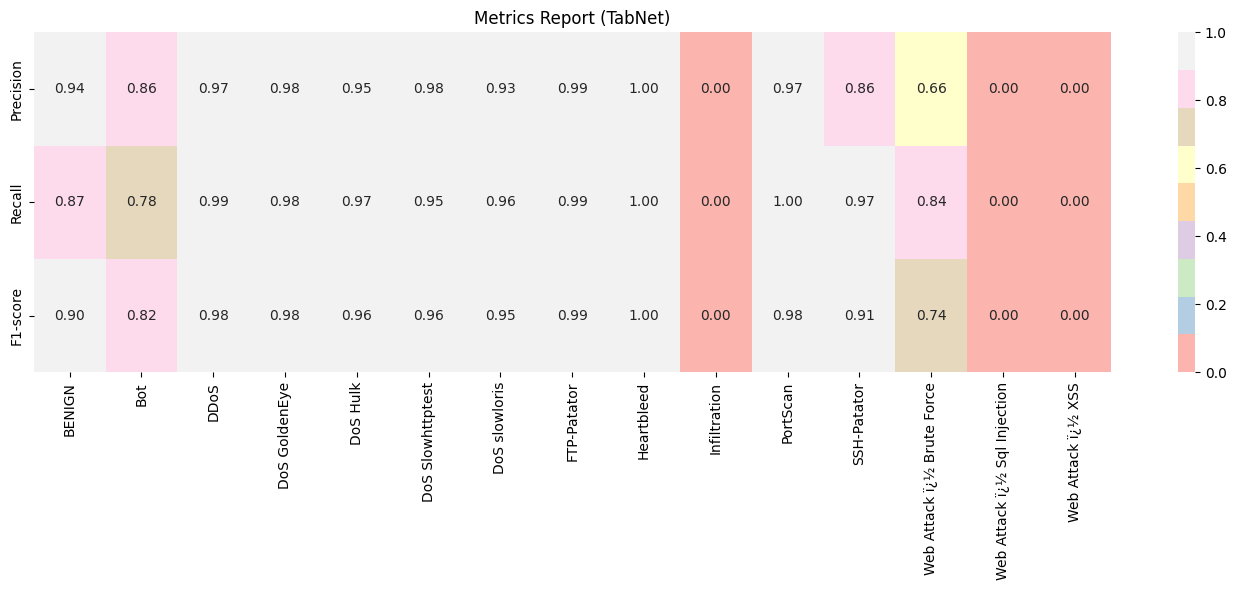

In [6]:
tabnet_results = train_and_evaluate(
    tabnet,
    "TabNet",
    X_train,
    y_train,
    X_test,
    y_test,
)

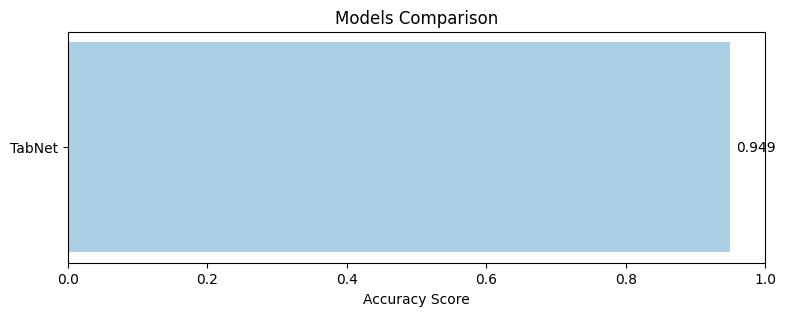

In [7]:
accuracies = [tabnet_results["accuracy"]]
acc_fig = plot_accuracies(accuracies, ["TabNet"])